In [1]:
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import json

from dataset_utils import *

import warnings
warnings.simplefilter("ignore")

In [19]:
def get_label(node, object_list, objects):
    object = objects[ object_list[node] ]
    if object['type'] == 'map':
        return str(object['layer'])
    if object['type'] == 'instance':
        return str(object['category'])

def get_color(node, object_list, objects):
    object = objects[ object_list[node] ]
    if object['type'] == 'map':
        return 'blue'
    if object['type'] == 'instance':
        return 'red'


def visualize_graph(adjacency_matrix, object_list, objects, layout):
    # Convert PyTorch tensor to numpy array
    adj_matrix = adjacency_matrix.cpu().numpy()

    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

    # Remove isolated nodes (nodes with no connections)
    G.remove_nodes_from(list(nx.isolates(G)))

    # If the graph is empty after removing isolated nodes, return
    if len(G) == 0:
        print("No connected nodes to display.")
        return

    # Set up the plot
    fig = plt.figure(figsize=(10, 10))
    
    # Generate a layout for the nodes
    if layout == 'spring':
        pos = nx.spring_layout(G, k=5, iterations=50)
    elif layout == 'kk':
        pos = nx.kamada_kawai_layout(G)
    elif layout == 'fr':
        pos = nx.fruchterman_reingold_layout(G)
    
    # Draw the nodes
    node_colors = [get_color(node, object_list, objects) for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)
    
    # Draw the edges
    nx.draw_networkx_edges(G, pos, arrows=True)
    
    # Add labels to the nodes
    labels = {node: get_label(node, object_list, objects) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=9)

    edge_labels_graph = {(u, v): edge_labels[ adj_matrix[u][v] ] for u, v in G.edges()}
    #edge_labels = {(u, v): adj_matrix[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_graph, font_size=8)

    
    # Show the plot
    plt.axis('off')
    plt.tight_layout()
    return fig

'''
# Example usage
# Create a sample adjacency matrix as a PyTorch tensor
adj_matrix = torch.tensor([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]  # This node is isolated
], dtype=torch.int)

visualize_graph(adj_matrix)
'''


'\n# Example usage\n# Create a sample adjacency matrix as a PyTorch tensor\nadj_matrix = torch.tensor([\n    [0, 1, 0, 0, 0],\n    [0, 0, 1, 1, 0],\n    [1, 0, 0, 0, 0],\n    [0, 0, 1, 0, 0],\n    [0, 0, 0, 0, 0]  # This node is isolated\n], dtype=torch.int)\n\nvisualize_graph(adj_matrix)\n'

In [3]:
traj = 0
with open('./data/objects/%d.pkl' % traj, 'rb') as f:
    objects = pickle.load(f)

with open('./data/metadata/%d.json' % traj, 'rb') as f:
    metadata = json.load(f)

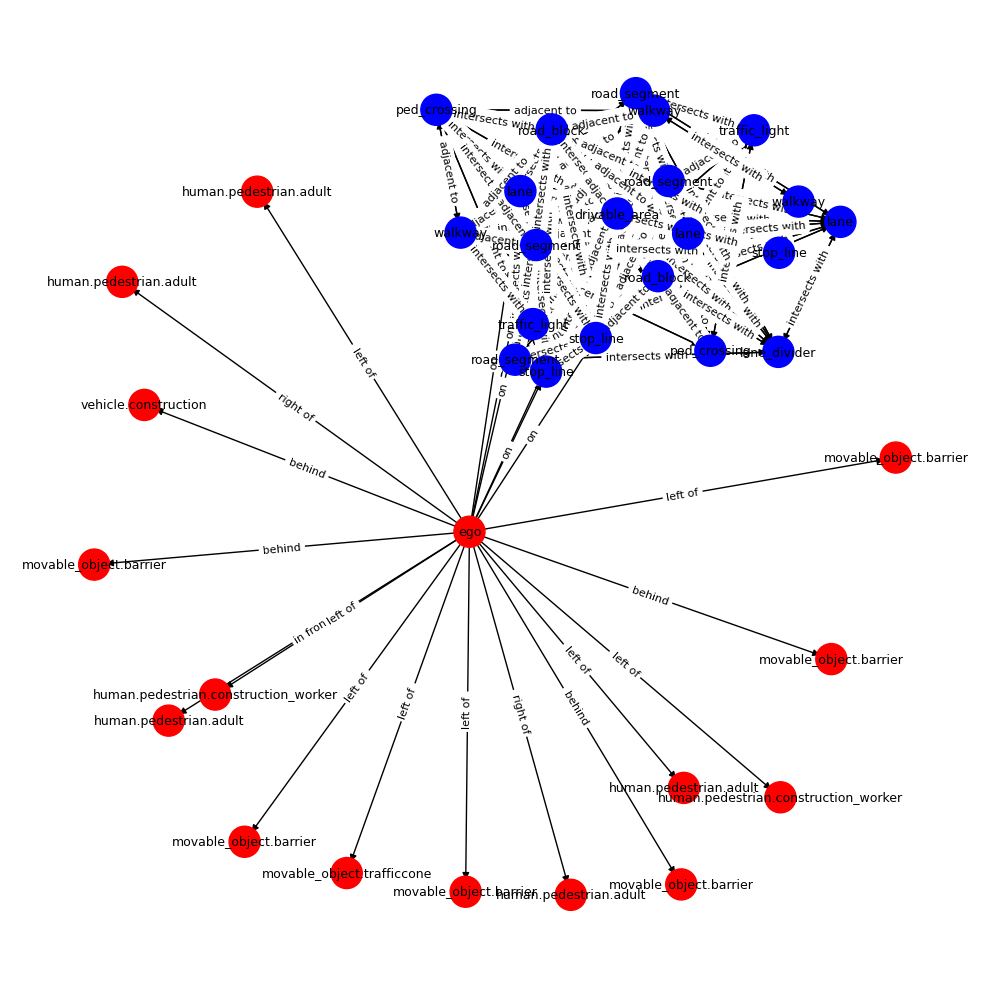

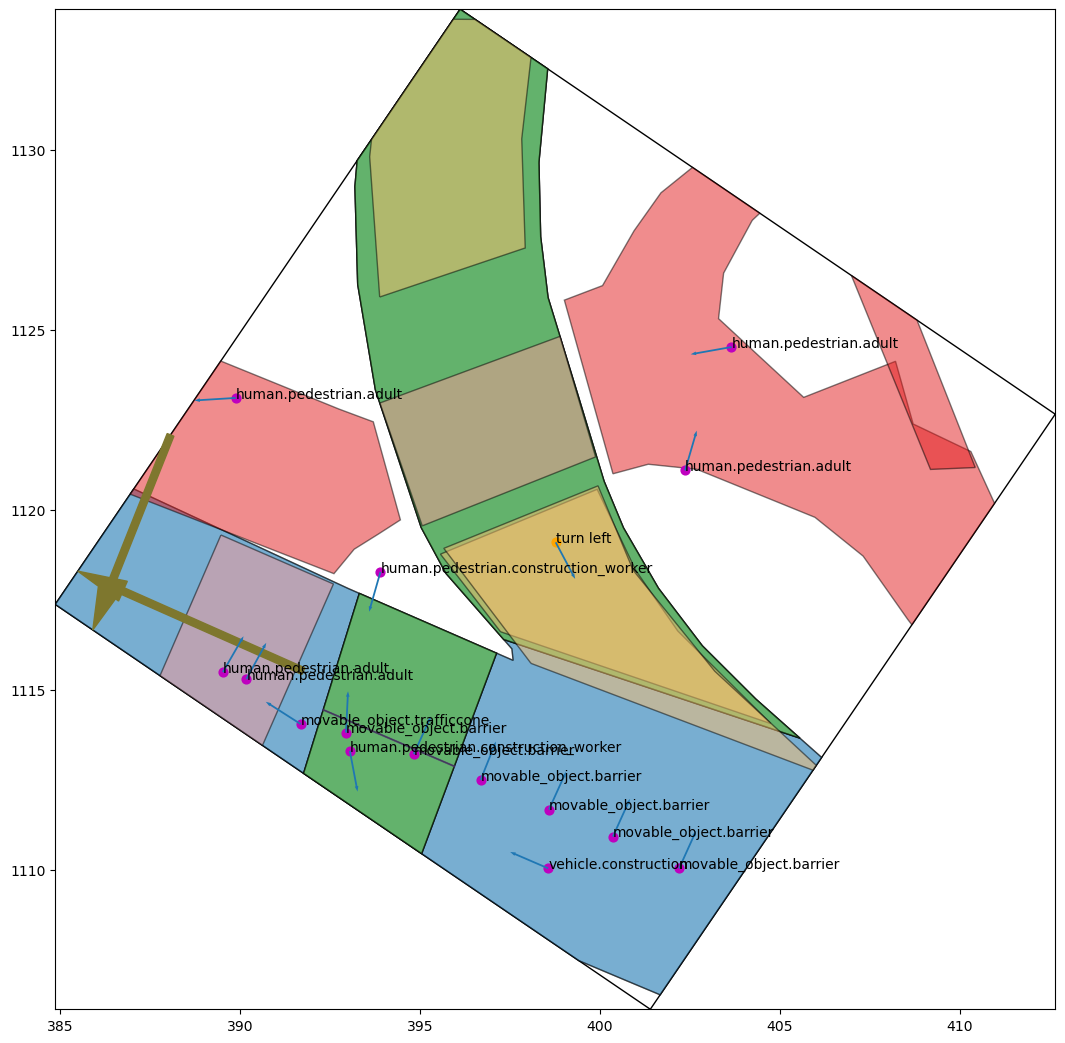

In [18]:
frame = 20
sg = torch.load('./data/scene_graphs/%d.pt' % traj).int()
sg_fig = visualize_graph(sg[frame], metadata['object_tokens'], objects[frame], layout='spring')

nusc_data = NuScenesSimple('./data', ['0','1','2'])
frame = select_frame(nusc_data[traj], frame)
map_fig = render_frame(frame)